<a href="https://colab.research.google.com/github/SushilKokare/AtiNeu_Project/blob/main/KA_5_ResNet50V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications import ResNet50V2
from matplotlib import pyplot as plt

In [7]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

In [8]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [9]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [10]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [14]:
base_model = ResNet50V2(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

94668760/94668760 [==============================] - 5s 0us/step


In [15]:
for layer in base_model.layers:
  layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
71/71 [==============================] - 688s 10s/step - loss: 5.6379 - accuracy: 0.7072 - val_loss: 1.5246 - val_accuracy: 0.6680
Epoch 2/10
71/71 [==============================] - 12s 175ms/step - loss: 0.1729 - accuracy: 0.9445 - val_loss: 1.2194 - val_accuracy: 0.7520
Epoch 3/10
71/71 [==============================] - 12s 166ms/step - loss: 0.0414 - accuracy: 0.9862 - val_loss: 0.9105 - val_accuracy: 0.7880
Epoch 4/10
71/71 [==============================] - 12s 168ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.8211 - val_accuracy: 0.7920
Epoch 5/10
71/71 [==============================] - 13s 182ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.7421 - val_accuracy: 0.7880
Epoch 6/10
71/71 [==============================] - 12s 161ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7184 - val_accuracy: 0.7960
Epoch 7/10
71/71 [==============================] - 12s 166ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.8040


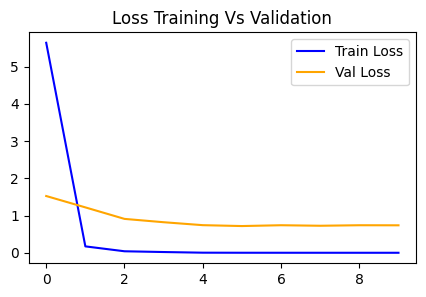

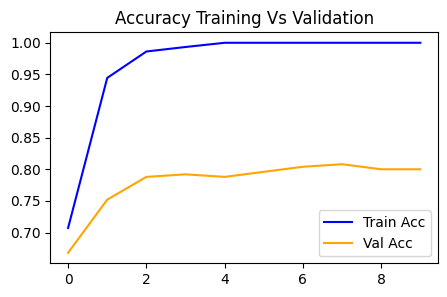

In [16]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

show_result(history)